# HAR 데이터를 활용한 RandomForest 모델 훈련 및 예측

## 데이터셋 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [8]:
len(feature_name_df)

561

In [15]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()

feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [16]:
x_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
x_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

x_train = pd.read_csv(x_train_url, sep='\s+', header=None)
x_test = pd.read_csv(x_test_url, sep='\s+', header=None)

In [19]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [20]:
x_train.columns = feature_name
x_test.columns = feature_name

x_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [21]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [23]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

## DecisionTree 모델 사용

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_test)

accuracy_score(y_test, pred)

0.8096369189005769

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [26]:
grid_cv.best_score_

0.8543335321892183

In [28]:
grid_cv.best_params_

{'max_depth': 8}

In [29]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


In [31]:
max_depth = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depth :
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(x_train, y_train)

    pred = dt_clf.predict(x_test)

    accuracy = accuracy_score(y_test, pred)

    print("max_depth : ", depth, ', Accuracy : ', accuracy)

max_depth :  6 , Accuracy :  0.8554462164913471
max_depth :  8 , Accuracy :  0.8734306073973532
max_depth :  10 , Accuracy :  0.8615541228367831
max_depth :  12 , Accuracy :  0.8595181540549711
max_depth :  16 , Accuracy :  0.8669833729216152
max_depth :  20 , Accuracy :  0.8652867322701052
max_depth :  24 , Accuracy :  0.8652867322701052


## RandomForest 모델 사용

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A co

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [34]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df = cv_results_df[['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']].sort_values('rank_test_score')

cv_results_df.head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.914445,100,10
25,1,0.914445,100,10
29,3,0.913085,200,10
26,3,0.913085,200,10
23,5,0.912813,200,8


In [35]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [36]:
grid_cv.best_score_

0.9144450489662677

In [37]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(x_train, y_train)

pred = rf_clf_best.predict(x_test)

accuracy_score(y_test, pred)

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9205972175093315

In [38]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=x_train.columns)

top20_cols = best_cols.sort_values(ascending=False)[:20]

top20_cols

angle(X,gravityMean)               0.034635
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026550
tGravityAcc-mean()-Y               0.026048
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012831
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011281
fBodyAccJerk-max()-X               0.011040
dtype: float64

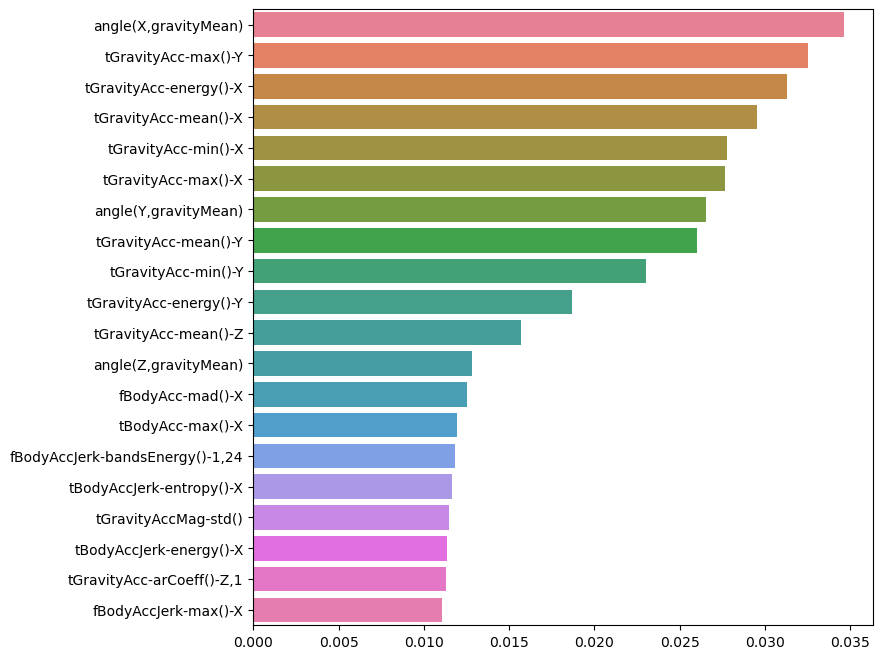

In [44]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.barplot(x=top20_cols, y=top20_cols.index, hue=top20_cols.index)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [45]:
x_train_re = x_train[top20_cols.index]
x_test_re = x_test[top20_cols.index]

rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(x_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(x_test_re)

accuracy_score(y_test, pred1_re)

0.8184594502884289